# Python Trading Toolbox: introducing OHLC charts with Matplotlib

In the first two posts of the Financial Trading Toolbox Series, we started exploring how to compute some basic indicators based on price ([simple moving averages](https://towardsdatascience.com/trading-toolbox-02-wma-ema-62c22205e2a9) and [other moving averages](https://towardsdatascience.com/trading-toolbox-02-wma-ema-62c22205e2a9)) and how to plot them on a chart together with the price. In those examples, we considered daily price data and used the closing price to represent each day of trading. Quite obviously, financial instruments trade throughout the whole day generating more than one price. The closing price is one of the most relevant prices but does not tell the whole story of what happened during the trading day.

__OHLC bars__ and [bar charts][1] are a traditional way to capture the range of prices of a financial instrument generated during the entire day of trading: for each single day, four prices are recorded: the opening price (Open), the highest price (High), the lowest price (Low), and the closing price (Close).

![OHLC bars](images/ttb03-OHLC-bars.png)

Bar charts are not limited to daily prices: weekly and monthly charts can be constructed using open, high, low and close for each period. They can be applied to intraday charts as well by using hourly bars, or bars for any desired interval (e.g. 30 minutes, 10 minutes, down to 1 minute).

Similarly to bar charts, [candlestick charts][2] are based on the Open, High, Low, and Close for each day, but use a different visual representation. The range between the Open and the Close is represented by a 'candle body' - which takes different colors depending on whether the Close is higher than the Open or the other way round. Highs and Lows are represented by 'candle wicks' (called *shadows*), placed above and below the body respectively. The use of candlestick charting originates from Japan and is associated with a kind of [analysis based on patterns][3]. 

![candlestick bars](images/ttb03-Candlestick-bars.png)

[1]: https://www.investopedia.com/terms/b/barchart.asp
[2]: https://www.investopedia.com/terms/c/candlestick.asp
[3]: https://school.stockcharts.com/doku.php?id=chart_analysis:introduction_to_candlesticks



### Creating OHLC Bar Charts with Python

There are several good visualization resources that enable us to create bar and candlestick charts in Python. Two of the best are **[Plot.ly][1]** and **[Bokeh][2]**. Both solutions allow creating professionally looking **interactive charts**. On the other hand, **[Matplotlib][3]** focuses on **static charts** and is capable of producing beautiful publication-quality figures. That is usually my first port of call when I have to produce static charts.

While the Matplotlib library is one of those elements that make Python a great environment for data visualization, when it comes to OHLC financial charts it has so far performed below its true potential. The package that handles the drawing of OHLC and candlestick charts within Matplotlib is called *mpl-finance*, a module that used to be part of the main Matplotlib distribution until it was declared deprecated and became available only as a separate package. That happened, I believe, for a good reason: mpl-finance is not particularly well integrated with *pandas* nor as easy to use as other plotting features of Matplotlib.
More recently, it has found a new maintainer, [Daniel Goldfarb][4], who is working at creating a new API for mpl-finance to make it more usable and consistent with *pandas* dataframes. The new version should be released at some point during 2020.

[1]: https://plot.ly/
[2]: https://bokeh.org/
[3]: https://matplotlib.org/
[4]: https://github.com/DanielGoldfarb

### A glimpse into the near future 

We can have a first look at how the upcoming version of mpl-finance is going to work and look like.
To preview the new version (a pre-release, at the time of writing), you just need to run:

```pip install mplfinance```

Note the spelling of the upcoming version: there is no '-' nor '_' in the name, while the current version is installed as `mpl-finance` and imported (quite confusingly) as `mpl_finance`. The new version will put an end to this name mixup.

We can now create our first price bar charts, using the same data for the **SPY** _ETF_ used in the [first post](https://towardsdatascience.com/trading-toolbox-01-sma-7b8e16bd9388) of the series. You can download the CSV file [here](https://raw.githubusercontent.com/stebas101/TradingToolbox/master/data/SPY.csv).

In [1]:
import pandas as pd

datafile = 'data/SPY.csv'
data = pd.read_csv(datafile, index_col = 'Date')
data.index = pd.to_datetime(data.index) # Converting the dates from string to datetime format

data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-20,198.119995,199.160004,198.080002,198.919998,180.141846,72763000
2014-08-21,199.089996,199.759995,198.929993,199.500000,180.667160,67791000
2014-08-22,199.339996,199.690002,198.740005,199.190002,180.386368,76107000
2014-08-25,200.139999,200.589996,199.149994,200.199997,181.301010,63855000
2014-08-26,200.330002,200.820007,200.279999,200.330002,181.418716,47298000
...,...,...,...,...,...,...
2019-08-13,287.739990,294.149994,287.359985,292.549988,292.549988,94299800
2019-08-14,288.070007,288.739990,283.760010,283.899994,283.899994,135622100
2019-08-15,284.880005,285.640015,282.390015,284.649994,284.649994,99556600


We can now import the newly installed *mplfinance* library:

In [2]:
import mplfinance as mpf

Creating a price bar chart (for the last 50 days of data) is as easy as:

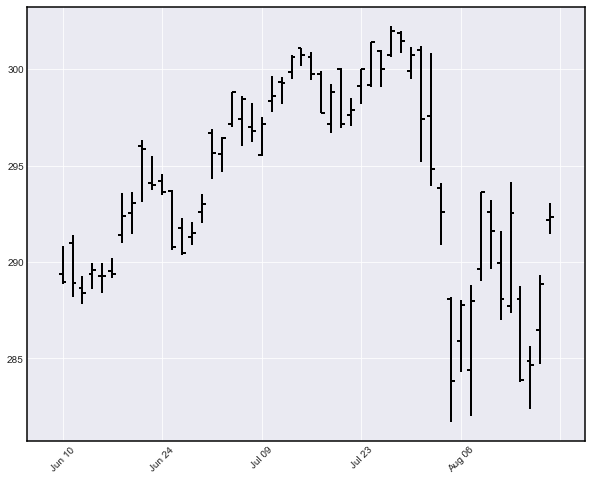

In [3]:
mpf.plot(data[-50:], no_xgaps = True)

If you are not using Jupyter, do not forget to add the following line to visualize this and the next charts:

```plt.show()```

Creating a candlestick chart is equally straightforward:

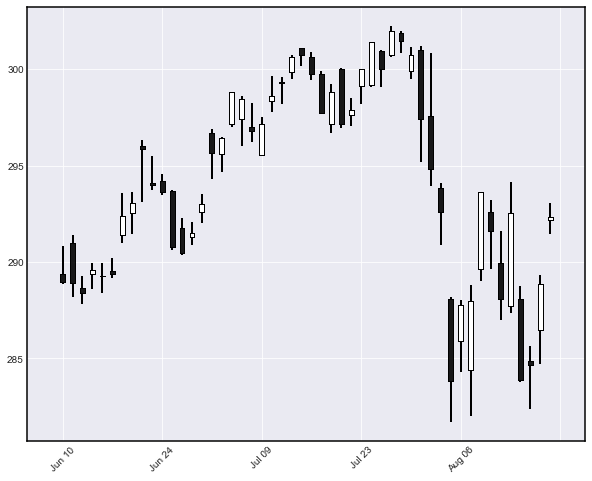

In [4]:
mpf.plot(data[-50:], type='candlestick', no_xgaps = True)

The visual results look appealing. The `no_xgaps` option is a nifty feature that eliminates the gaps usually generated by days with no trading data (e.g. weekends and public holidays).

# The current _mpl-finance_ library

The current version of _mpl_finance_ can be installed using:
```
pip install mpl-finance
```

or

```
conda install mpl-finance
```

if you are using *Conda* as a package manager. Compared to the version to be released, the current _mpl-finance_ library requires some data manipulation to create a simple OHLC or candlestick chart. In particular:
- We need to present the data as a sequence of OHLC price sequences.
- The time and dates need to be expressly converted to a format that Matplotlib understands.

Luckily, all those operations will become obsolete once the new version is released, hopefully soon during 2020. For now, I just present my code to perform those tasks without going too much into detail. Feel free to reuse it:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mpl.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]

In [6]:
ohlc[:20]

[[735465.0, 198.119995, 199.16000400000001, 198.080002, 198.919998],
 [735466.0, 199.08999599999999, 199.759995, 198.929993, 199.5],
 [735467.0, 199.33999599999999, 199.690002, 198.740005, 199.190002],
 [735470.0, 200.139999, 200.58999599999999, 199.149994, 200.199997],
 [735471.0, 200.330002, 200.820007, 200.279999, 200.330002],
 [735472.0, 200.429993, 200.570007, 199.940002, 200.25],
 [735473.0, 199.58999599999999, 200.270004, 199.389999, 200.139999],
 [735474.0, 200.449997, 200.729996, 199.820007, 200.71000700000002],
 [735478.0, 200.970001, 201.0, 199.860001, 200.610001],
 [735479.0, 201.380005, 201.41000400000001, 200.220001, 200.5],
 [735480.0,
  200.83999599999999,
  201.580002,
  199.66000400000001,
  200.21000700000002],
 [735481.0, 200.169998, 201.190002, 199.41000400000001, 201.110001],
 [735484.0, 200.919998, 201.21000700000002, 200.0, 200.58999599999999],
 [735485.0, 200.41000400000001, 200.550003, 198.91000400000001, 199.320007],
 [735486.0, 199.429993, 200.199997, 198.77

We can now use the data to plot a bar chart:

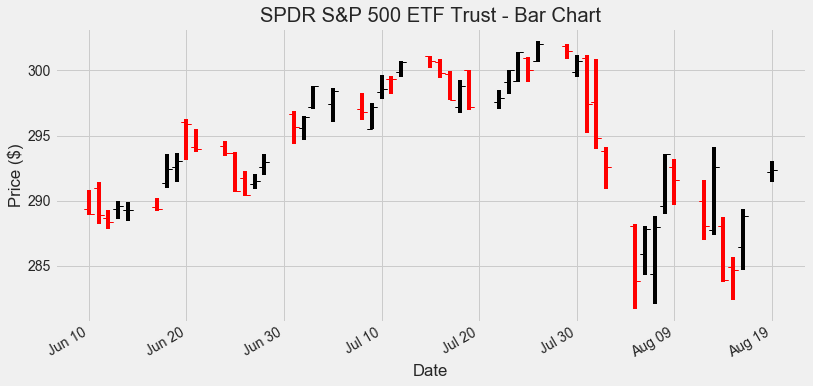

In [7]:
import mpl_finance as mpf # This is the old mpl-finance library - note the '_' in the library name

# We can now feed the ohlc matrix into mpl-finance to create a candle stick chart:

plt.style.use('fivethirtyeight')
# fig = plt.figure(figsize = (12,6))
# ax = plt.subplot2grid((1,1), (0,0))
fig, ax = plt.subplots(figsize = (12,6))

# mpf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5, colorup='#77d879', colordown='#db3f3f')
mpf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('SPDR S&P 500 ETF Trust - Bar Chart')

# Choosing to display the dates as "Month Day":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# This is to automatically arrange the date labels in a readable way:
fig.autofmt_xdate()

# plt.show() # add this if you're not using Jupyter Notebook

By default, bars with a Close higher than the Open are colored in black, while bars with a Close below the Open are colored in red. There are some visible horizontal gaps in the chart: they are generated by non-trading days (weekends and public holidays). Removing them requires some extra non-trivial [filtering](https://matplotlib.org/gallery/ticks_and_spines/date_index_formatter.html).

Similarly, a candlestick chart can be generated as follows:

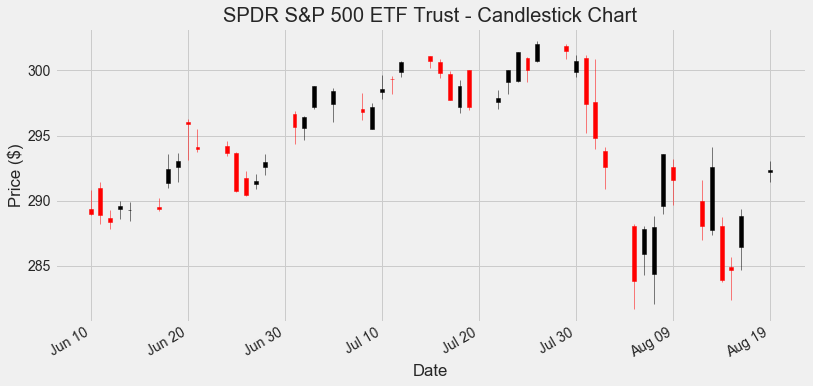

In [8]:
fig, ax = plt.subplots(figsize = (12,6))

mpf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('SPDR S&P 500 ETF Trust - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

fig.autofmt_xdate()

# plt.show() # add this if you're not using Jupyter Notebook

## Unleashing the Power of OHLC data

Using OHLC prices instead of just one single series as the Closing Price opens up a new world of possibilities: we can assess the range that prices covered during each trading day, observe the relationship of the Close versus the Open, check whether prices have risen above previous highs or fallen below previous lows and so on.

Here I will present a fairly simple example of a chart that makes use of High and Low prices as well as Close prices. This chart comes from a trading technique known as **Camelback Technique**. I am not interested in describing the trading technique in detail (plenty of information can be found on the [web](https://forexsb.com/wiki/trading/camelback-technique)): we are just using the chart associated with it as a useful tool to spot existing trends.

We overlay the following moving averages on a daily price bar chart:

- 40-Day Simple Moving Average of the **Highs**.
- 40-Day Simple Moving Average of the **Lows**.
- 15-Day Exponential Moving Average of the **Closing** prices.

This can be coded as follows:

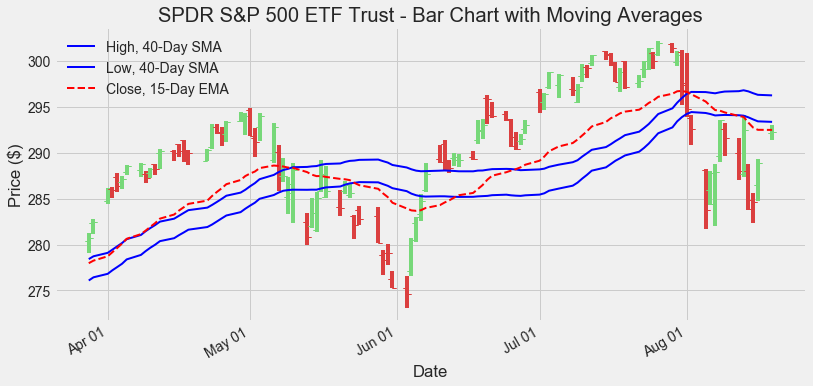

In [9]:
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mpf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('SPDR S&P 500 ETF Trust - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

# plt.show() # add this if you're not using Jupyter Notebook

The two simple moving averages drawn in blue create a **channel**: compared to a single moving average, we now have a *grey area* when prices are neither above nor below the channel.

As an example, we could now adopt the following trading rules:

1. Enter *long positions* (buying) only when the price bars are completely **above the higher 40-Day SMA**.
2. Enter *short positions* (selling) only when the price bars are completely **below the lower 40-Day SMA**.
3. We do not enter any position (we keep *flat* on the market) when the prices are **between** the two 40-Day SMAs, or the last bar is crossing any of them.

Another example could be to:

1. Enter *long positions* only when the 15-Day EMA is above the higher 40-Day SMA.
2. Enter *short positions* only when the 15-Day EMA is below the lower 40-Day SMA.
3. Stay *flat* elsewhere, i.e. when the 15-Day EMA is inside the channel created by the two SMAs.

At this stage, we should be asking whether those rules (or any of the methods mentioned in the [first article on moving averages](https://towardsdatascience.com/trading-toolbox-01-sma-7b8e16bd9388)) can be used to build a profitable trading system. In other words, we should be asking whether those ideas will help us generate profits instead of making losses, and how to choose the best set of rules. I will try to address this in the next post. We will learn how to *backtest* a trading system to calculate the profits or losses based on historical data.